## Explorotary data analyisis

In [1]:
import chaos_lib_utils.reporting as r
import os
import pandas as pd
import re
import matplotlib as plt
from scipy.stats import linregress
import seaborn as sns
from matplotlib.lines import Line2D


# Minimum number of rows, assumung 1 data point per second  
MINIMUM_TIME = 300

# load all files in the LOG_DIR
LOG_DIR = os.path.join(os.getcwd(), "experiments", "runs")
all_log_files = [f for f in os.listdir(LOG_DIR) if f.endswith(".log")]



# Valid files, corresponding to df indexes
files = []
dataframes = []

for file in all_log_files:
    df = r.read_csv(file)
    # only consider files with more than TIMe
    length = len(df)
    if length < MINIMUM_TIME:
        print(f"Skipping {file} because it has less than {MINIMUM_TIME} rows")
        continue
    else:
        dataframes.append(df)
        files.append(file)
        
print(len(dataframes))
print(len(files))
                       

Skipping single_pod_failure_2024-12-20_01-43-24.log because it has less than 300 rows
24
24


### Plot each series as raw

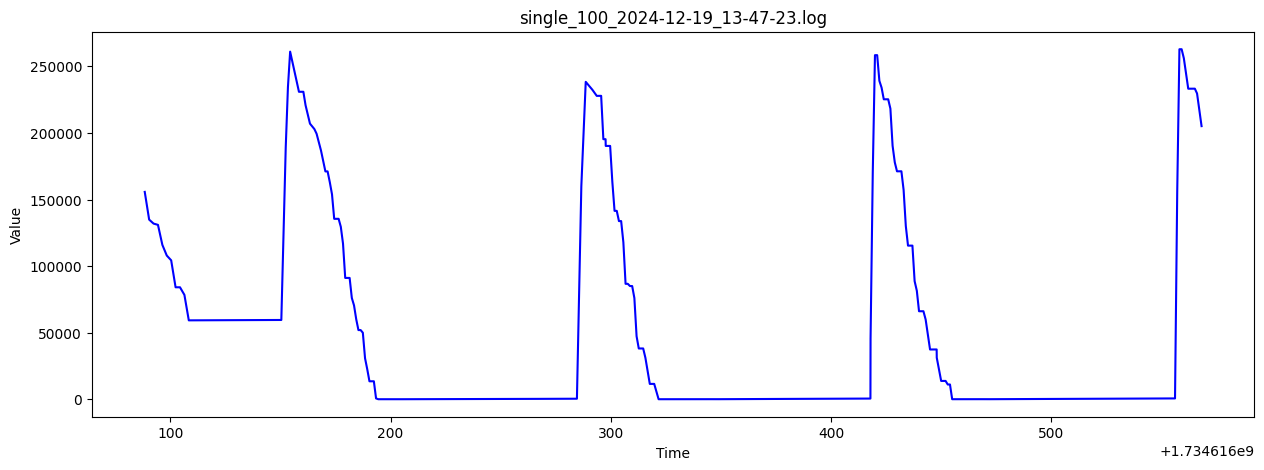

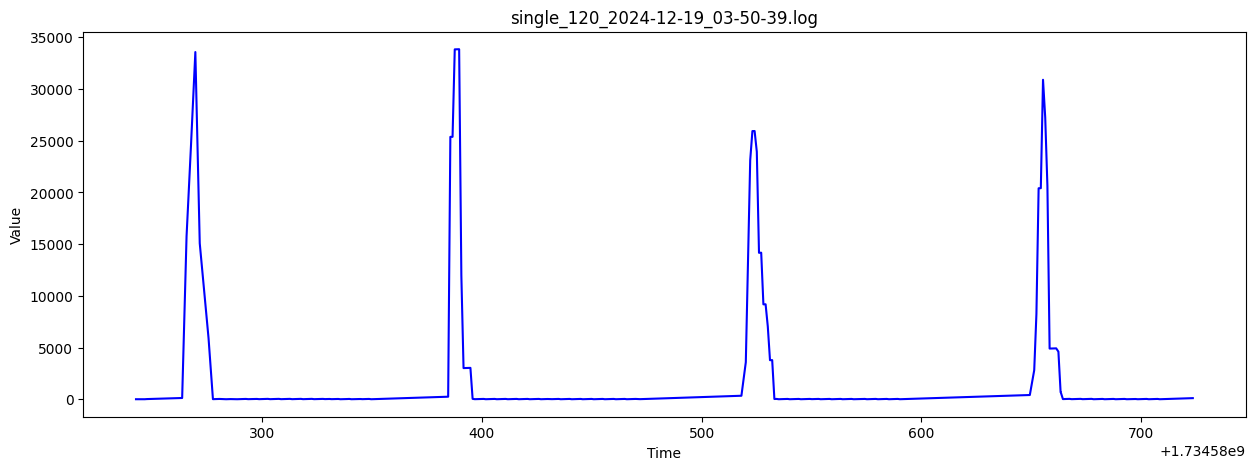

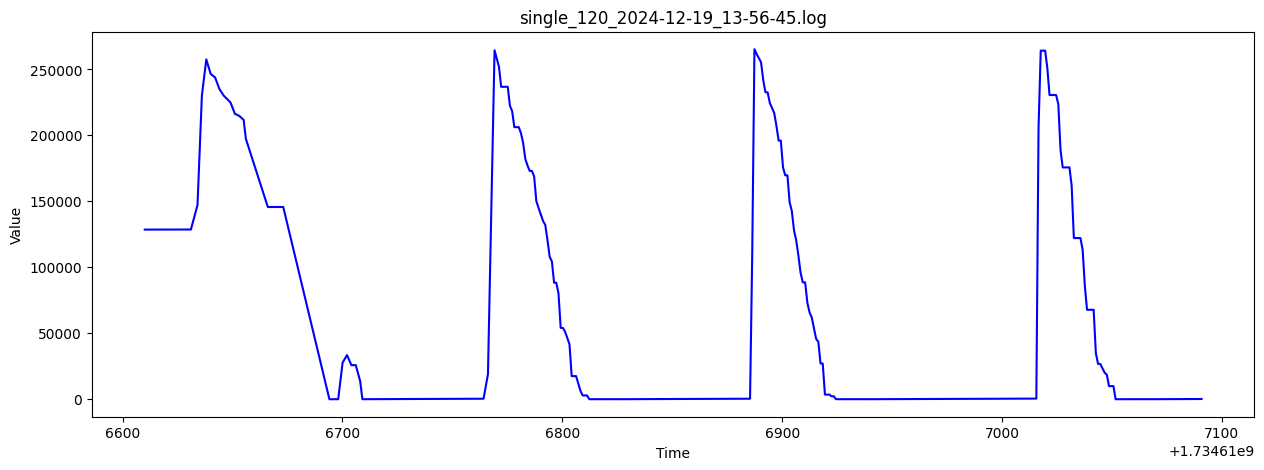

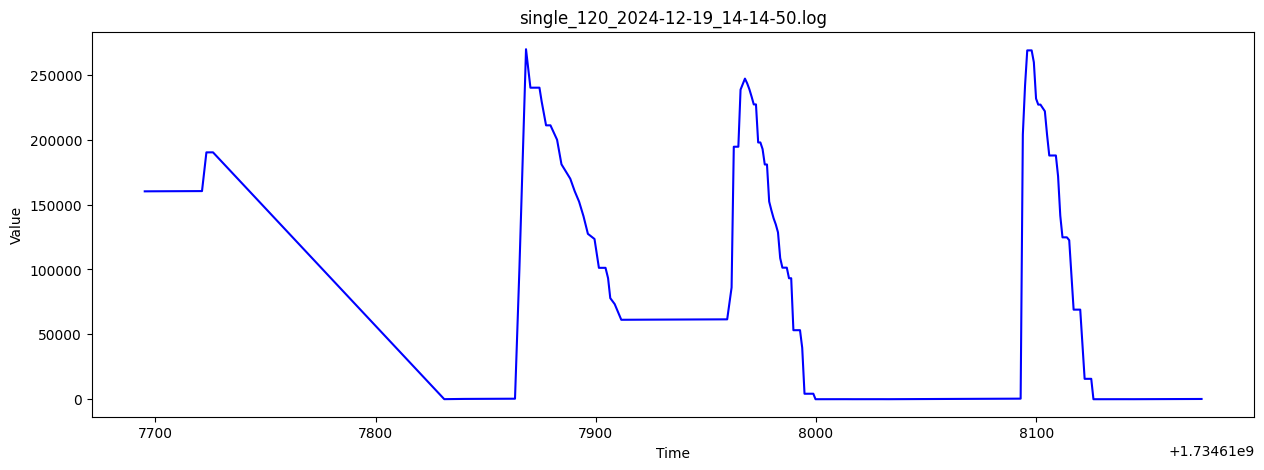

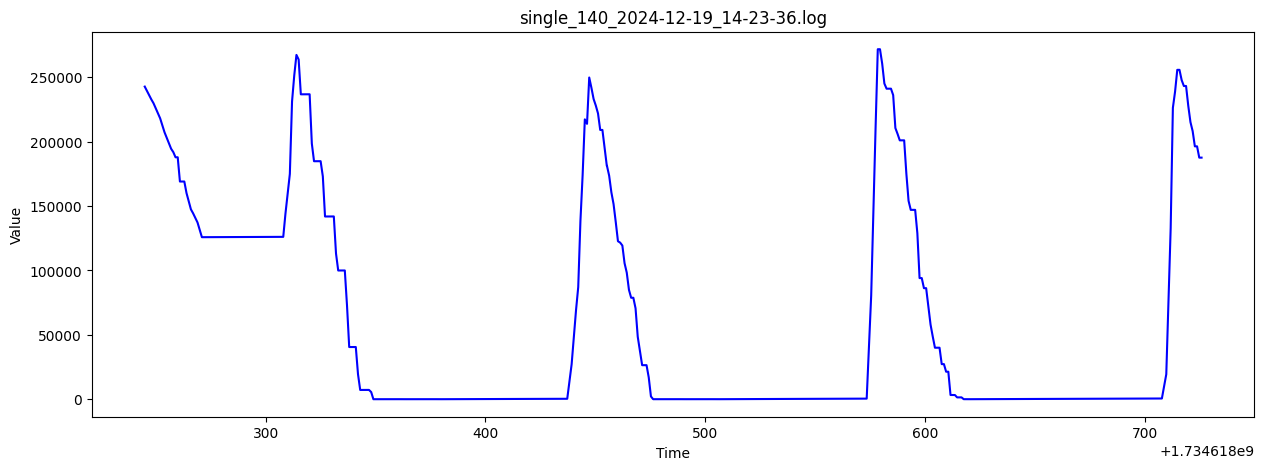

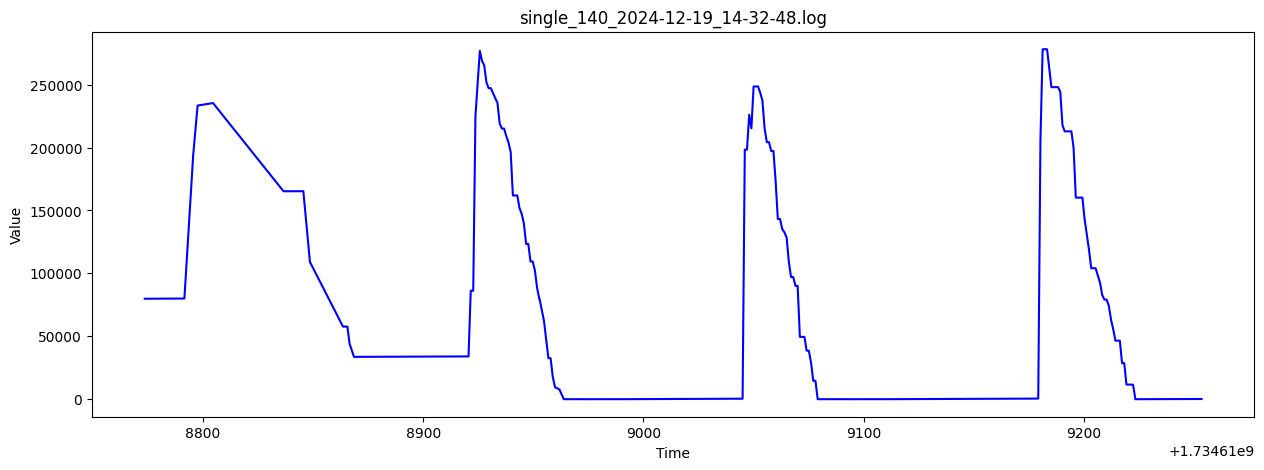

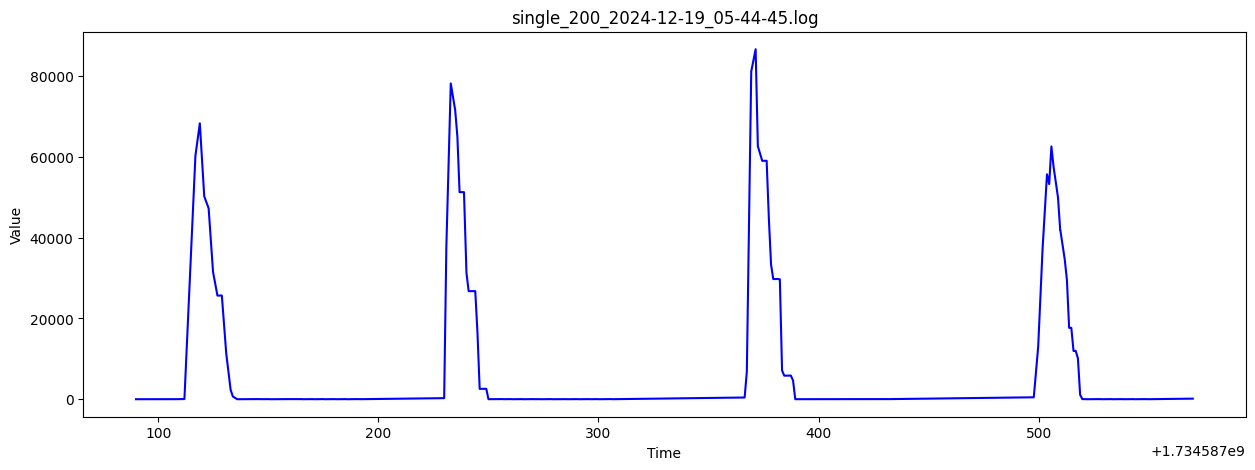

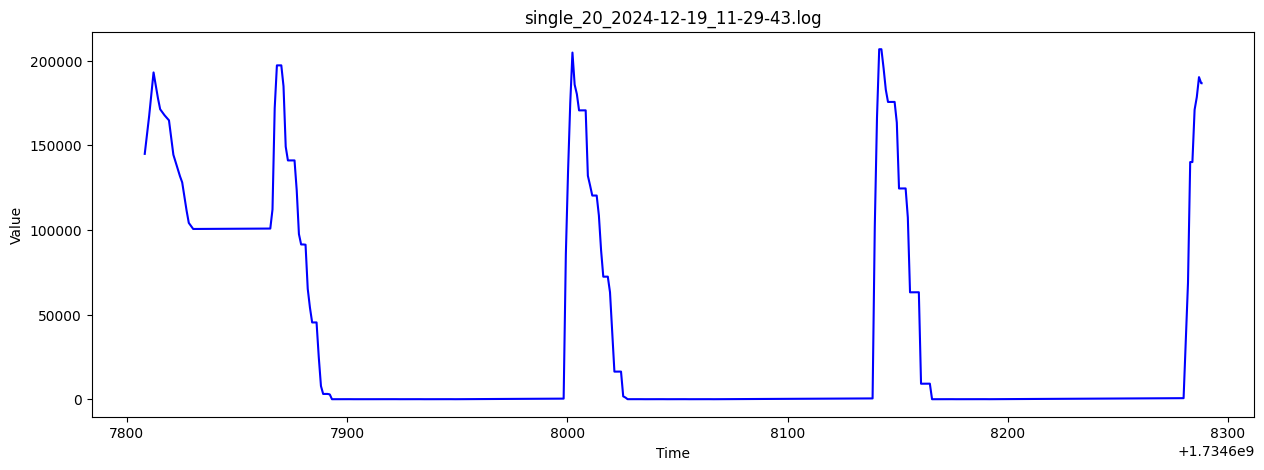

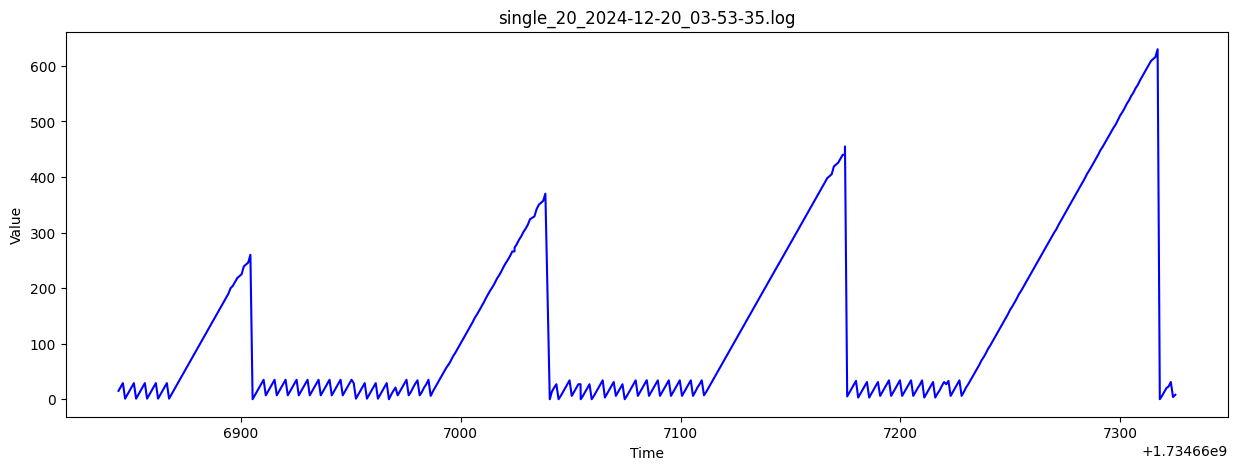

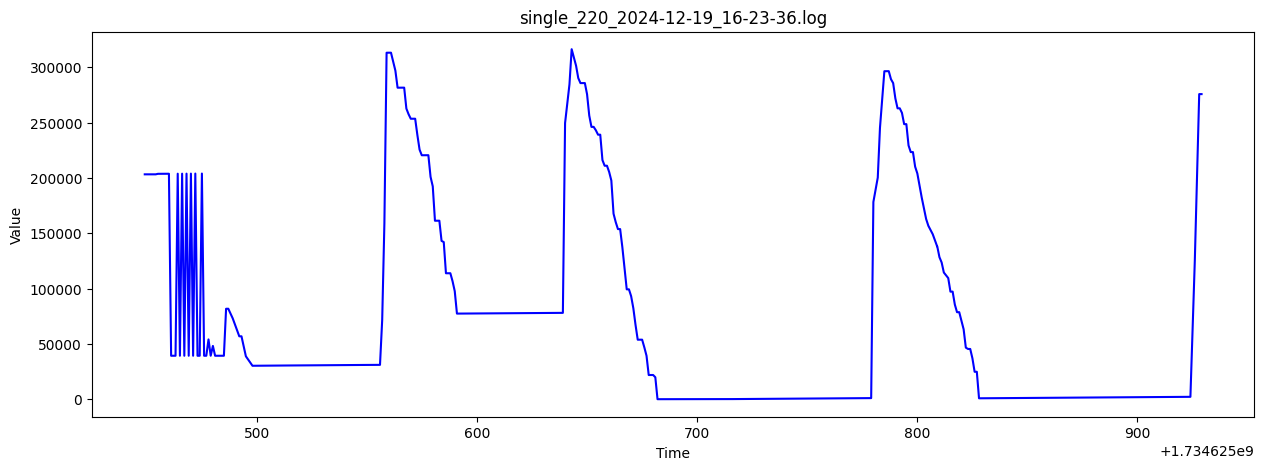

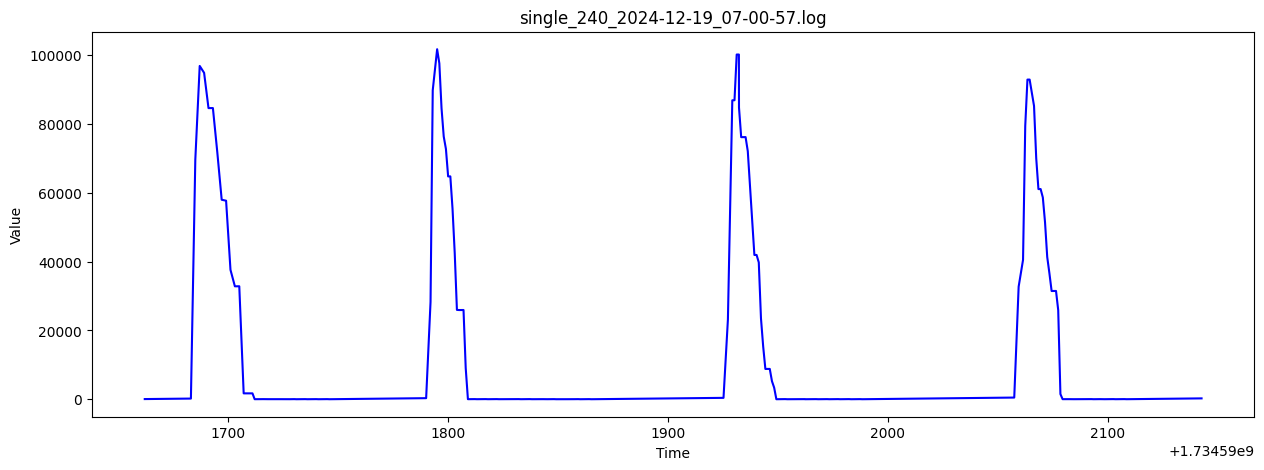

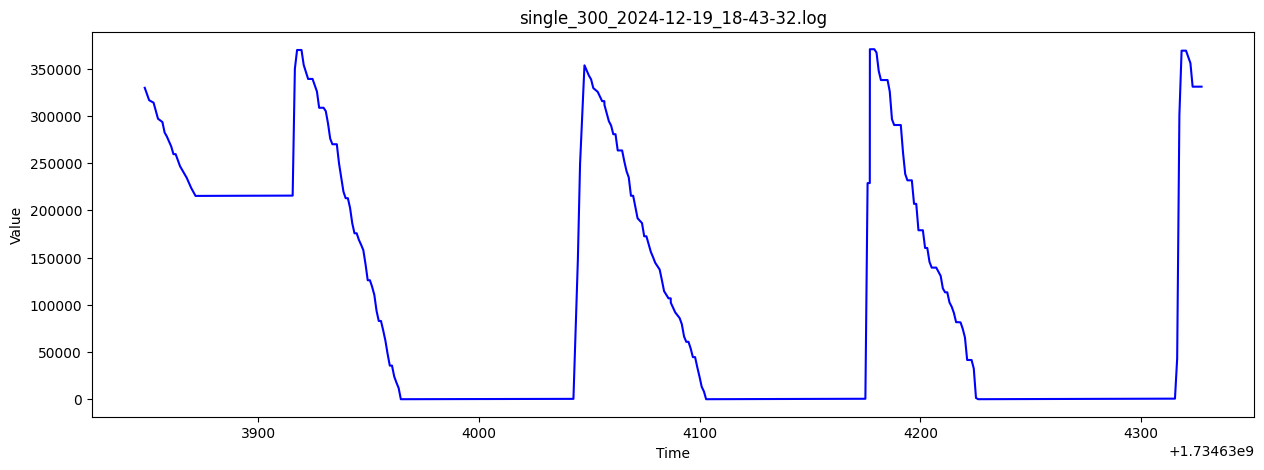

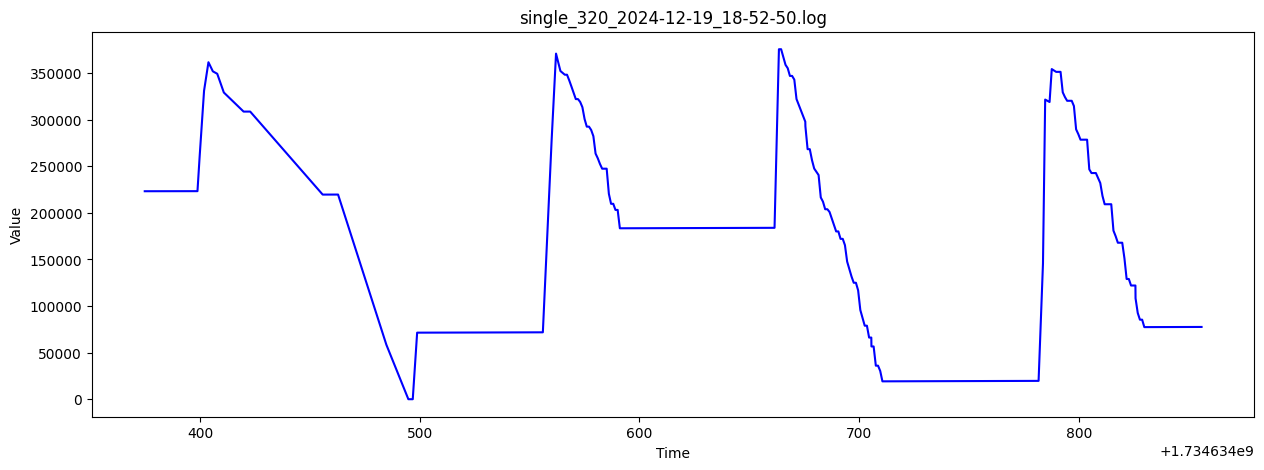

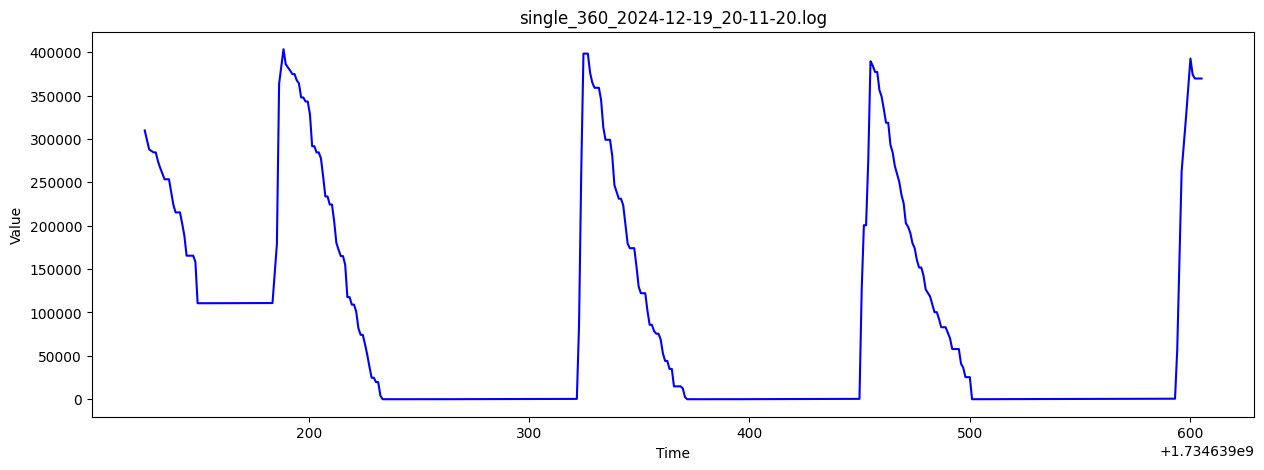

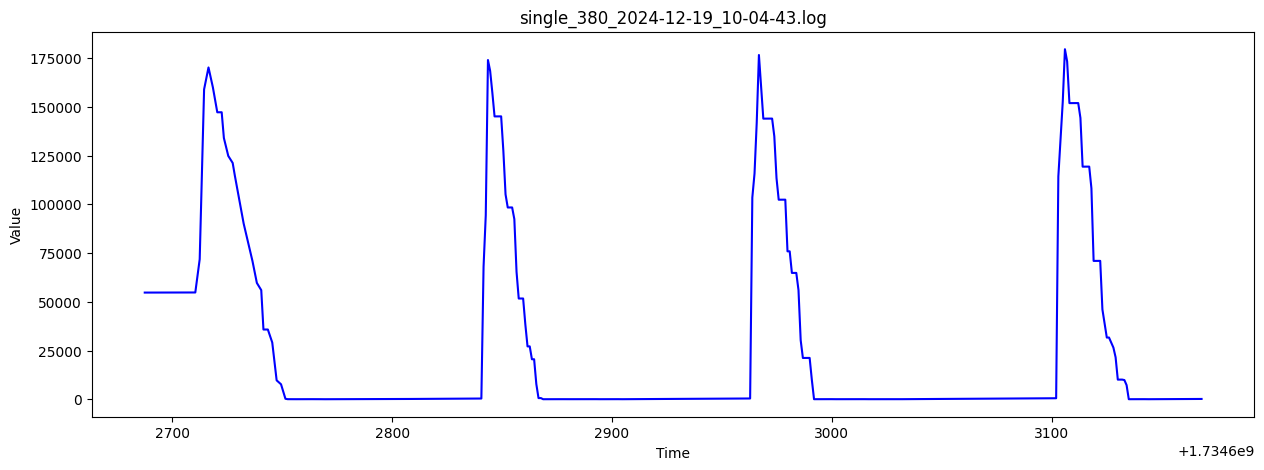

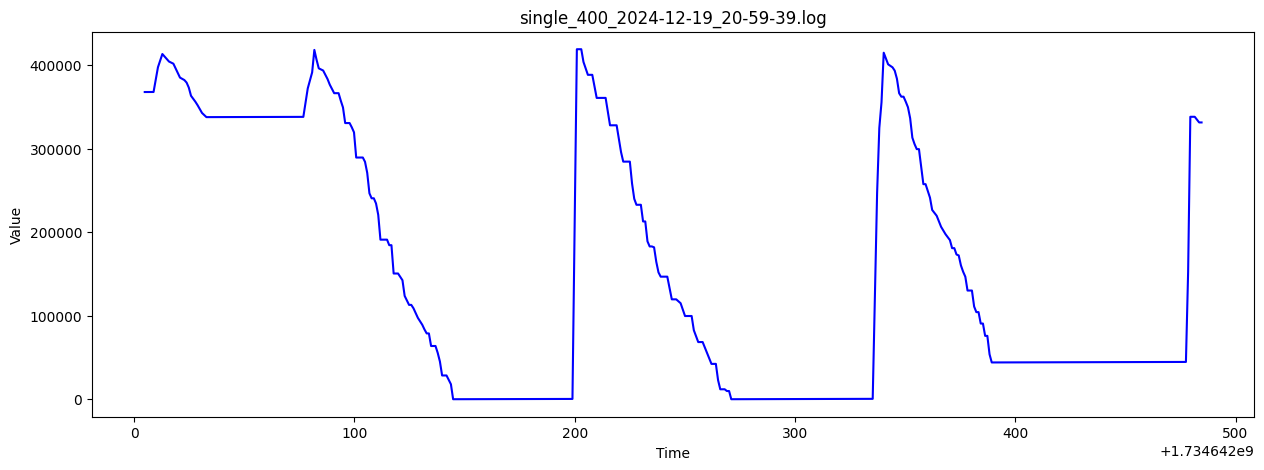

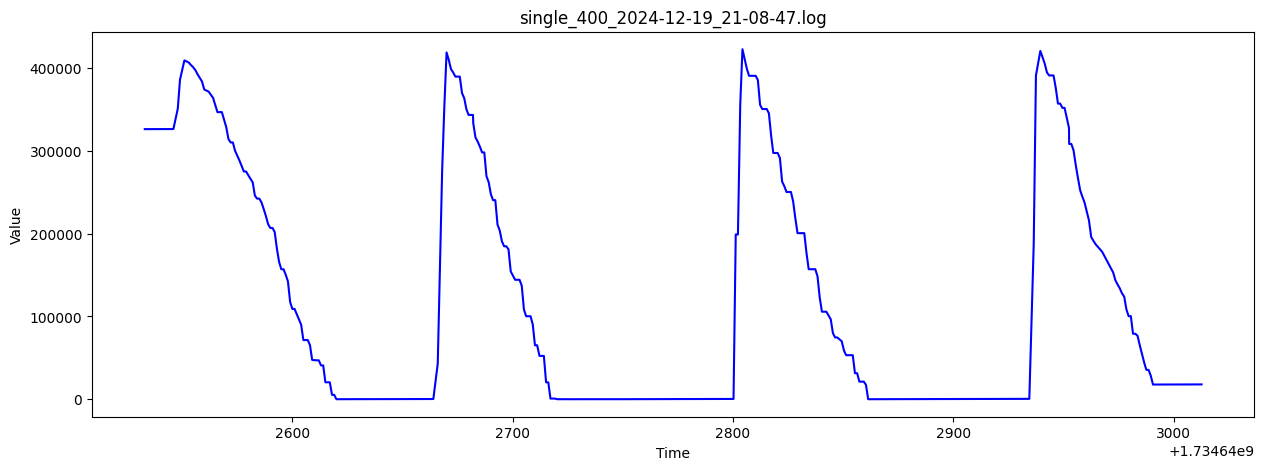

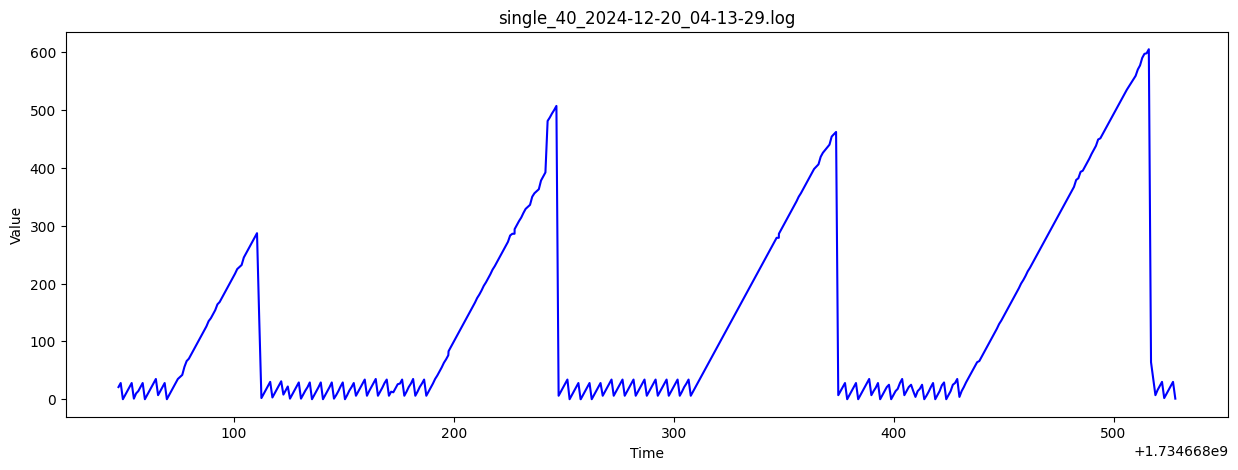

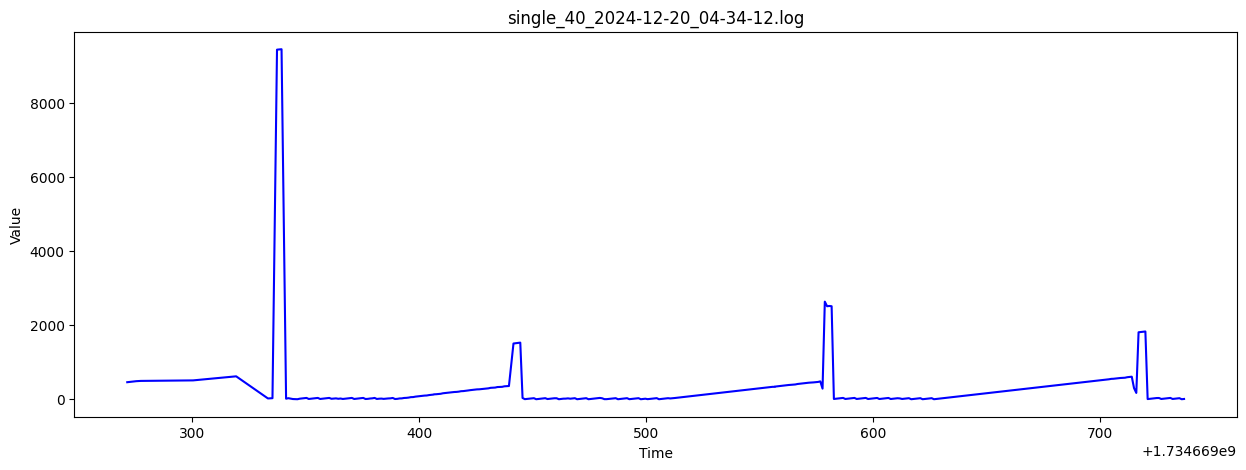

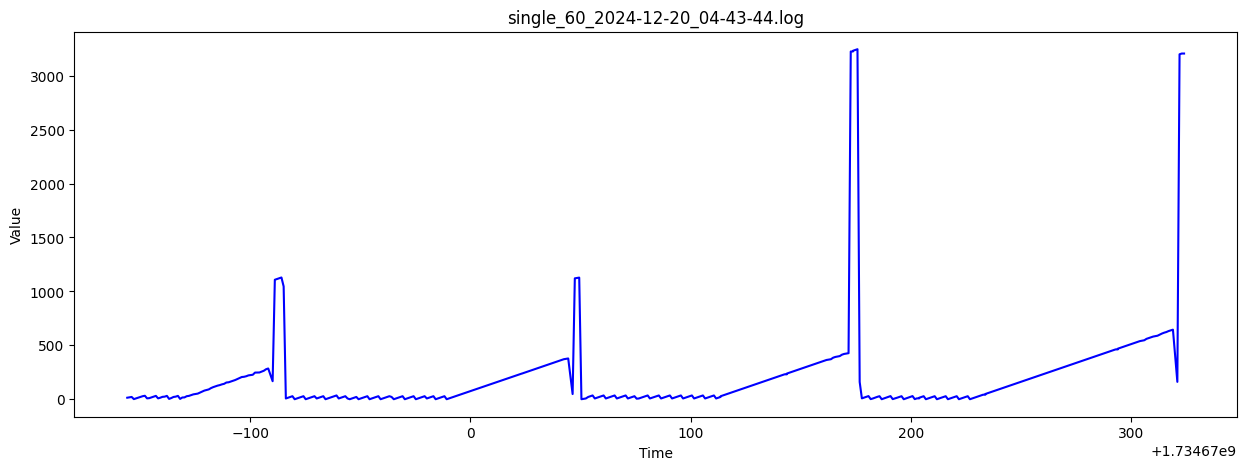

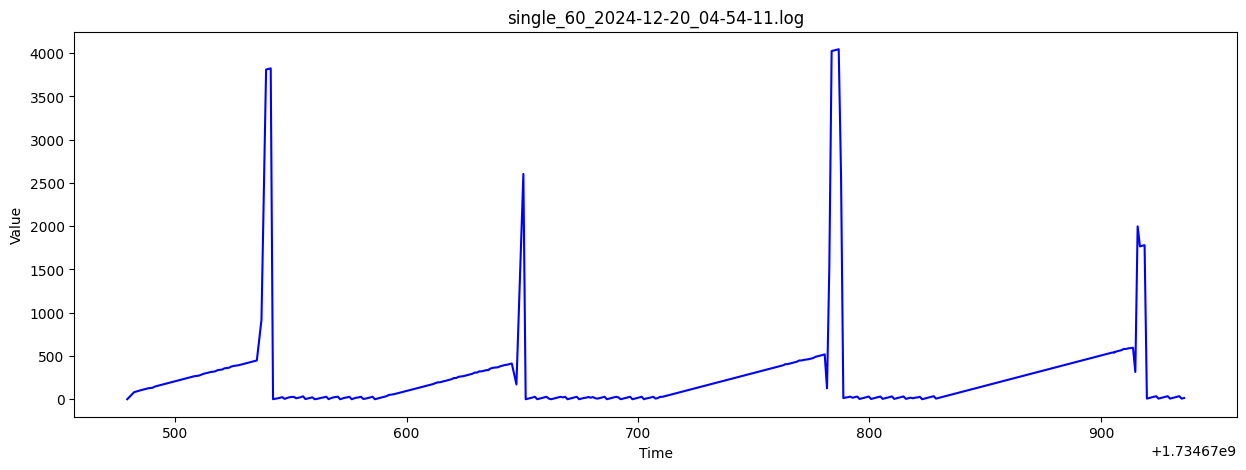

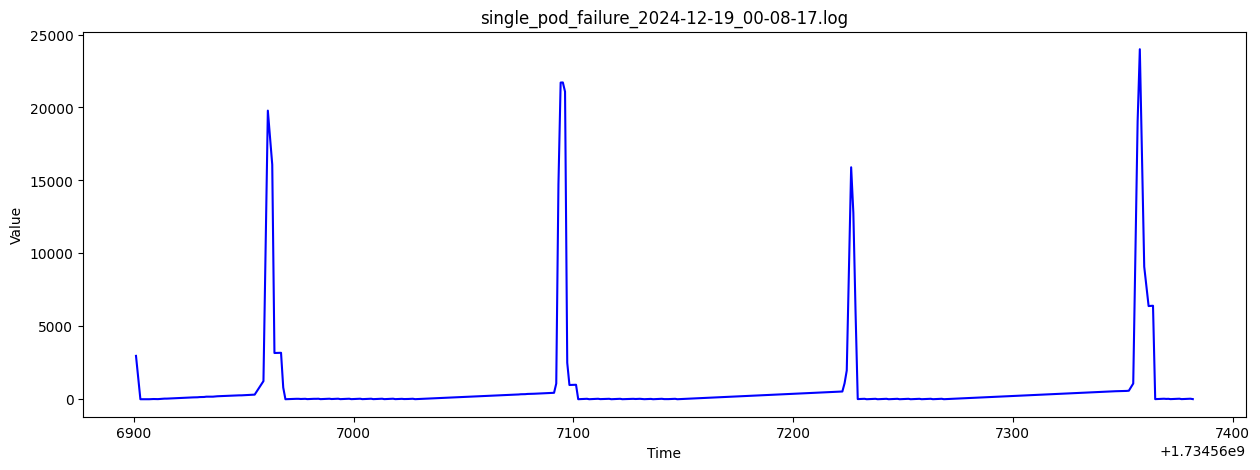

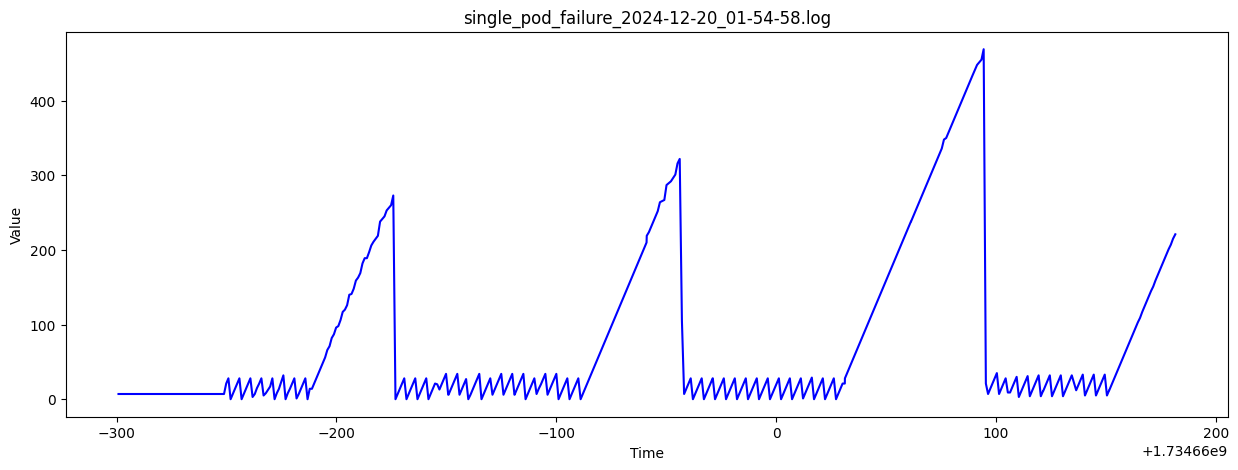

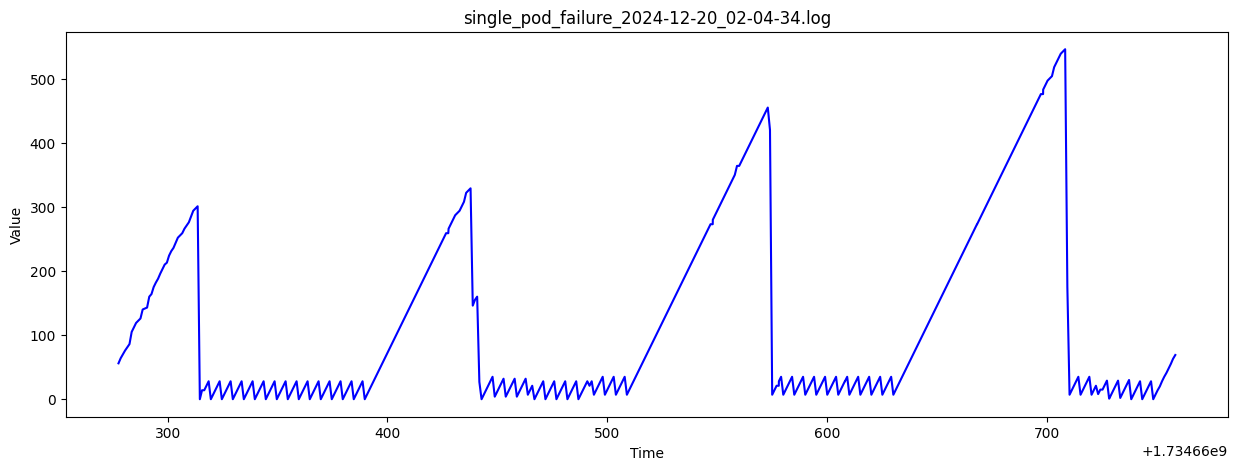

,Metric,Time,Value
0,Lag_Input_Topic,1.734660e+09,56
1,Lag_Input_Topic,1.734660e+09,64
2,Lag_Input_Topic,1.734660e+09,76
3,Lag_Input_Topic,1.734660e+09,86
4,Lag_Input_Topic,1.734660e+09,105


In [2]:
for i in range(0, len(dataframes)):
    r.plot_time_series(dataframes[i], label=files[i])

df.head()

In [3]:
# For each filename, print the index
for i, file in enumerate(files):
    print(f"{i}, {file}")

0, single_100_2024-12-19_13-47-23.log
1, single_120_2024-12-19_03-50-39.log
2, single_120_2024-12-19_13-56-45.log
3, single_120_2024-12-19_14-14-50.log
4, single_140_2024-12-19_14-23-36.log
5, single_140_2024-12-19_14-32-48.log
6, single_200_2024-12-19_05-44-45.log
7, single_20_2024-12-19_11-29-43.log
8, single_20_2024-12-20_03-53-35.log
9, single_220_2024-12-19_16-23-36.log
10, single_240_2024-12-19_07-00-57.log
11, single_300_2024-12-19_18-43-32.log
12, single_320_2024-12-19_18-52-50.log
13, single_360_2024-12-19_20-11-20.log
14, single_380_2024-12-19_10-04-43.log
15, single_400_2024-12-19_20-59-39.log
16, single_400_2024-12-19_21-08-47.log
17, single_40_2024-12-20_04-13-29.log
18, single_40_2024-12-20_04-34-12.log
19, single_60_2024-12-20_04-43-44.log
20, single_60_2024-12-20_04-54-11.log
21, single_pod_failure_2024-12-19_00-08-17.log
22, single_pod_failure_2024-12-20_01-54-58.log
23, single_pod_failure_2024-12-20_02-04-34.log


### Identify and plot the chaos events

65.80850005149841


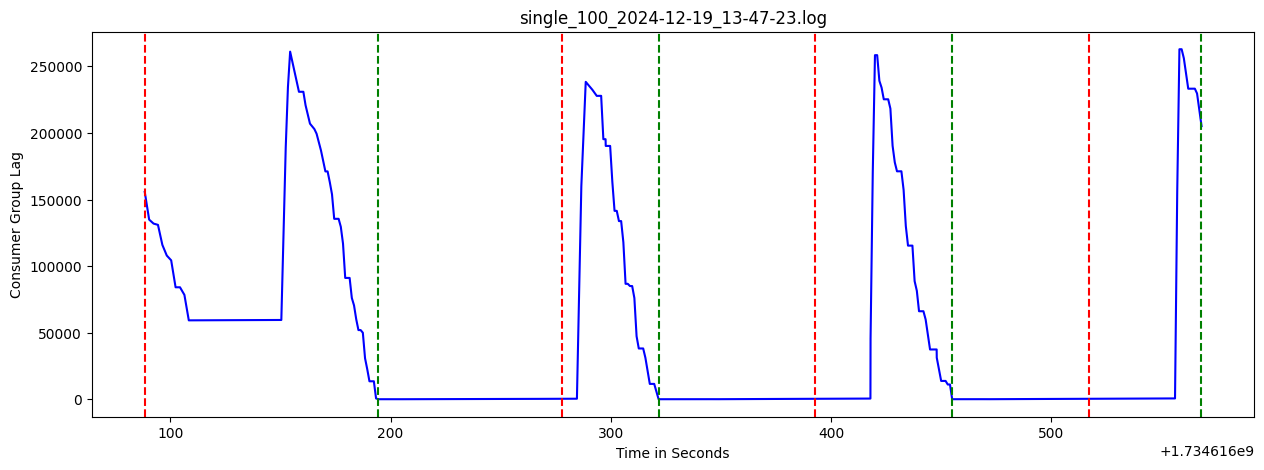

51.095499992370605


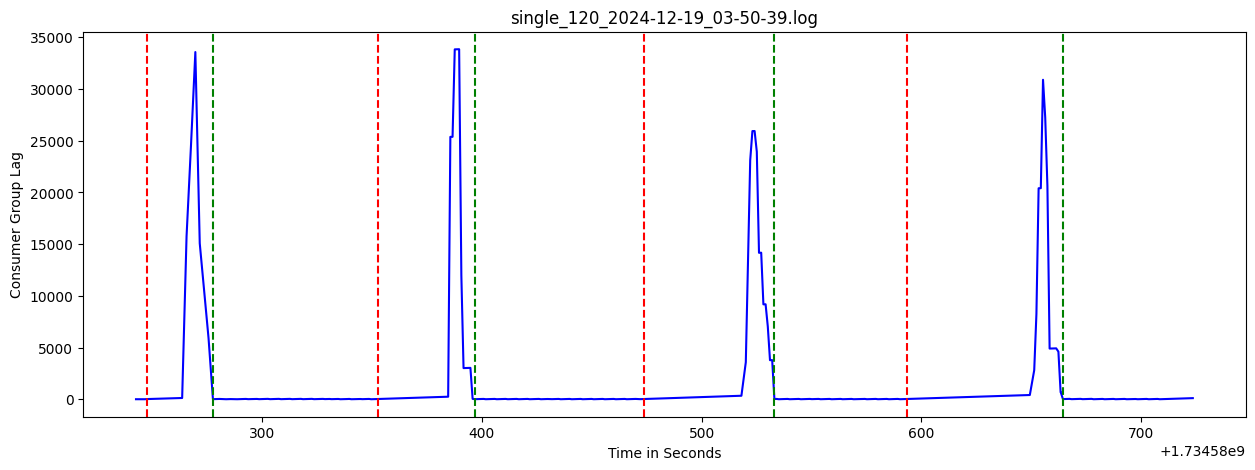

56.48659996986389


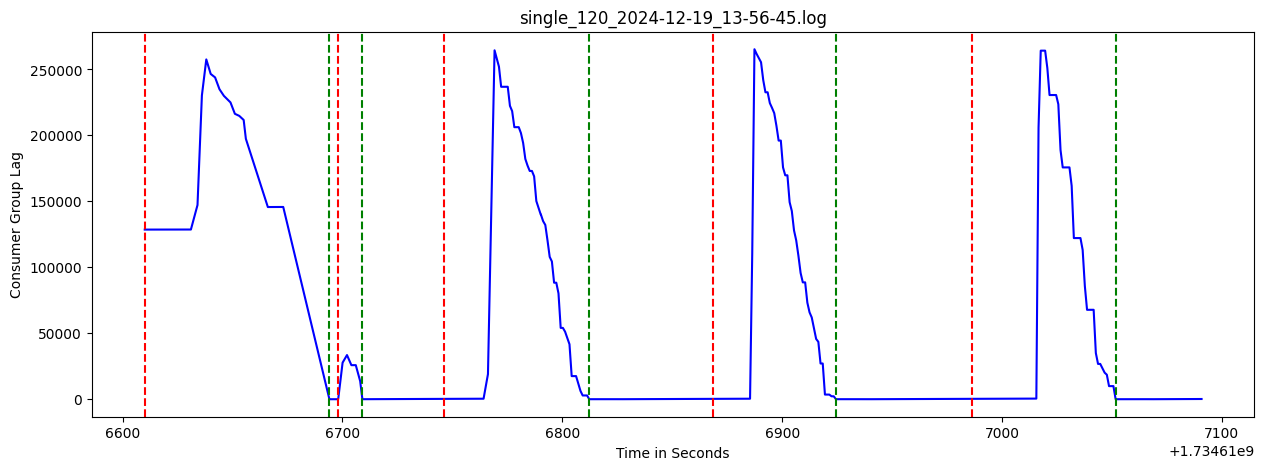

104.1736666361491


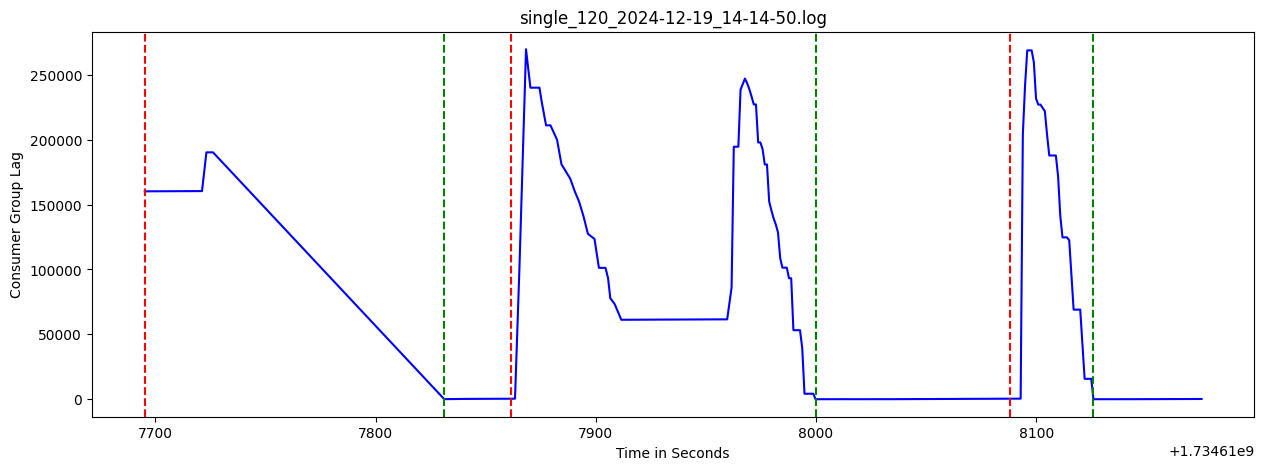

64.06049996614456


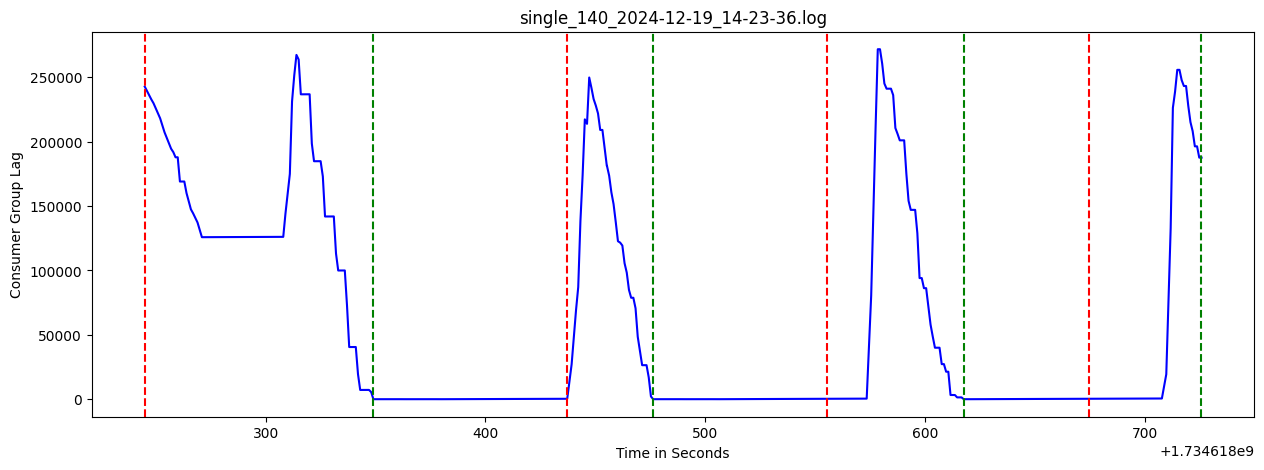

95.83500003814697


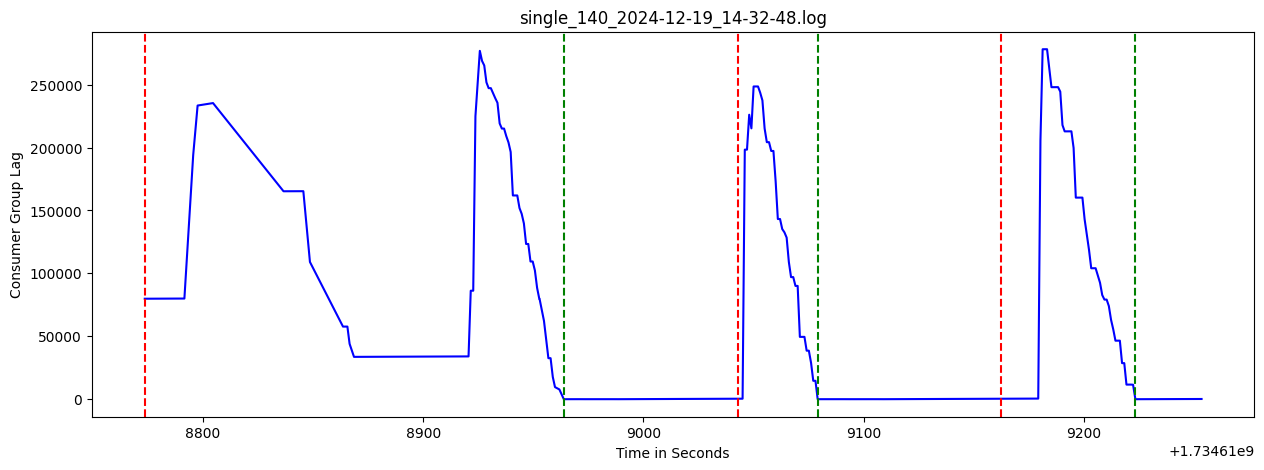

59.35175001621246


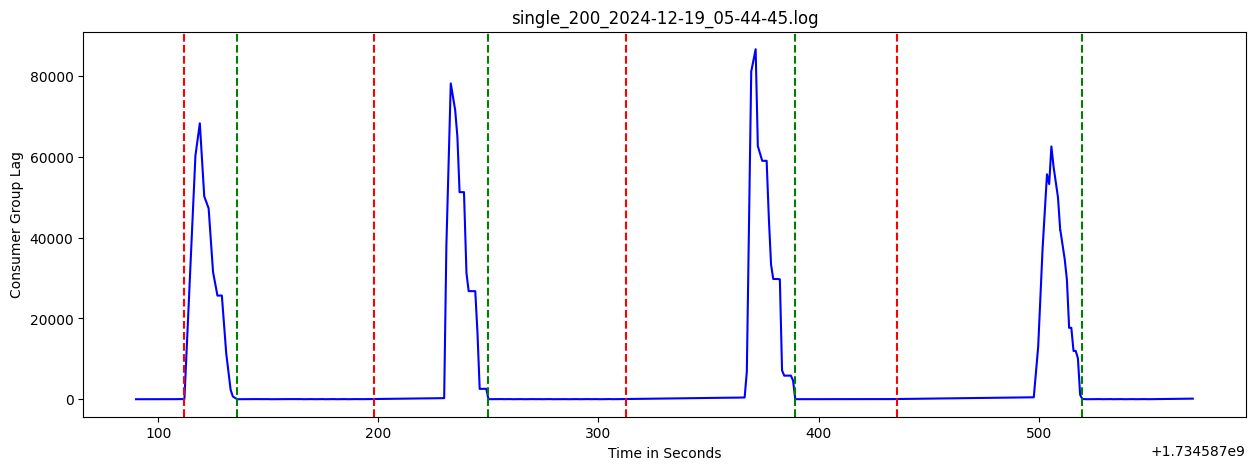

62.82300001382828


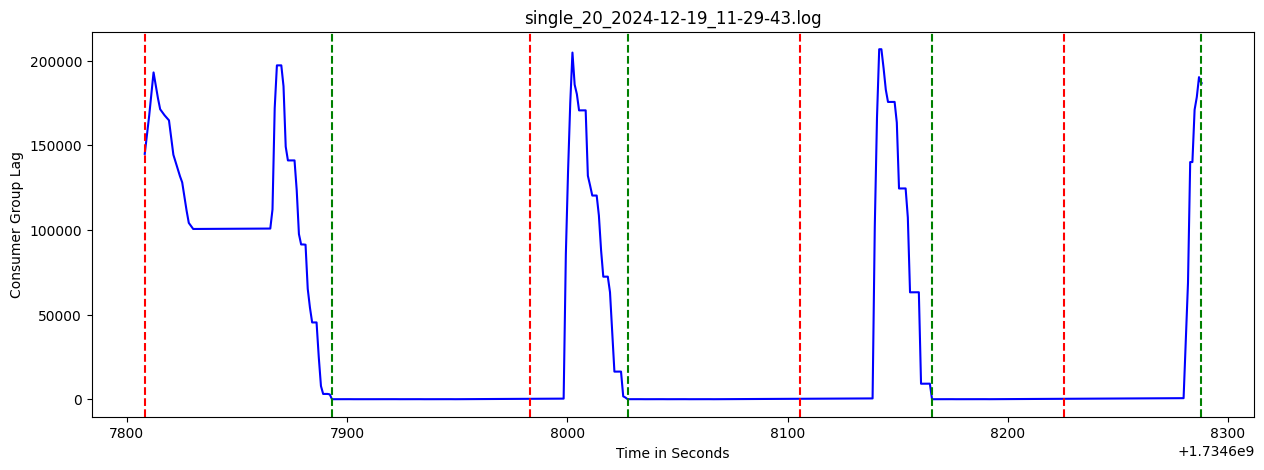

58.6157500743866


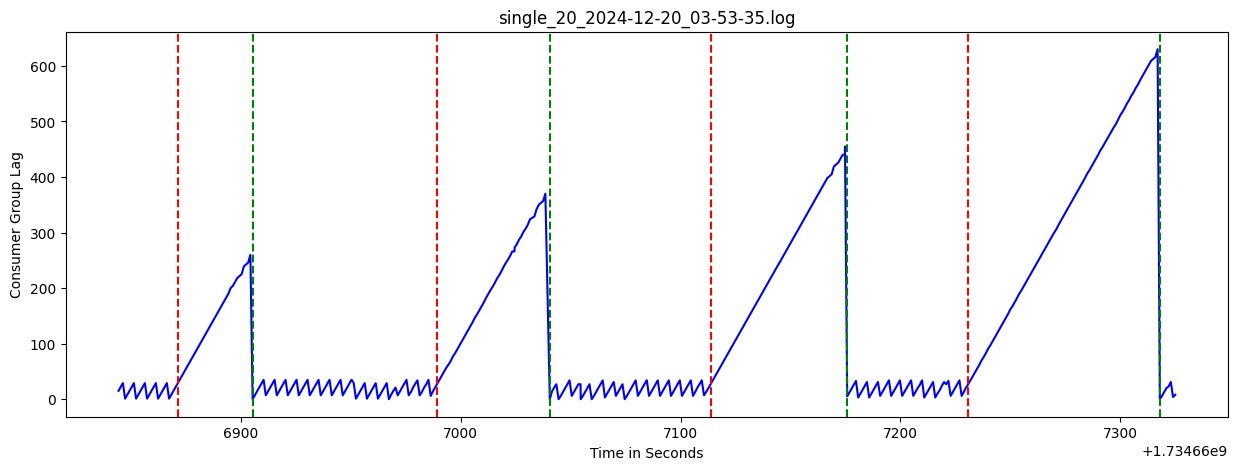

82.09266670544942


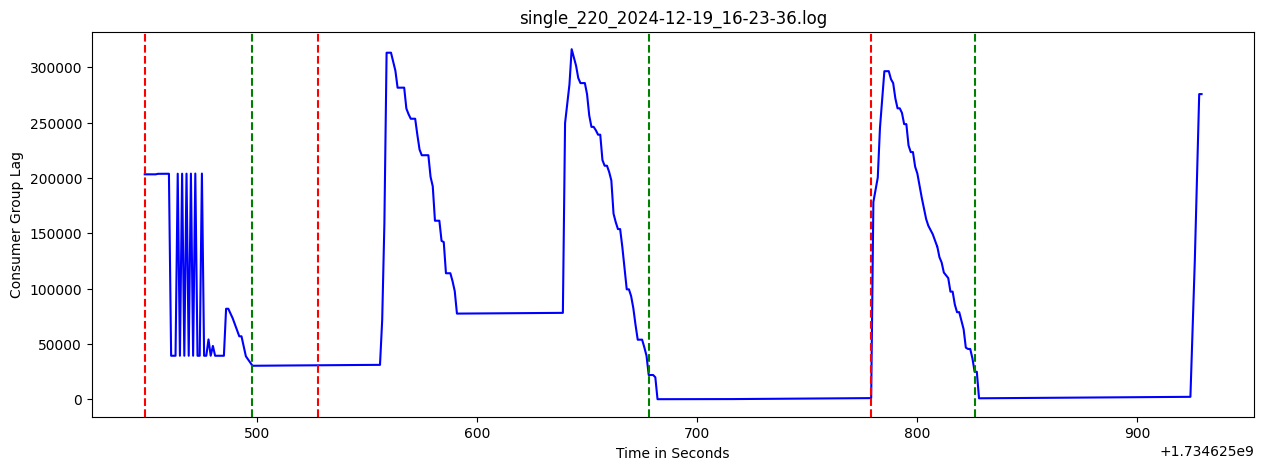

59.796750009059906


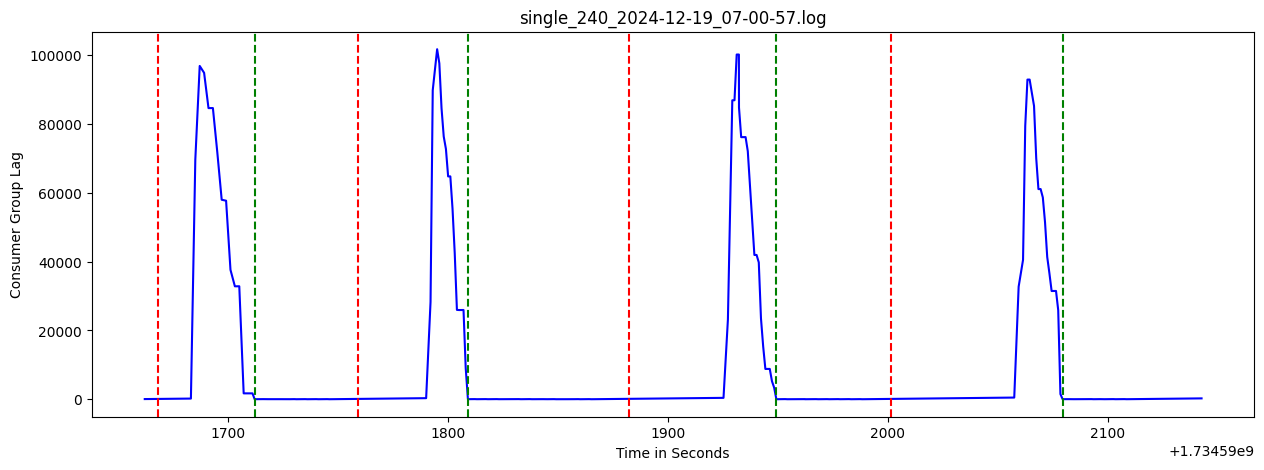

63.801500022411346


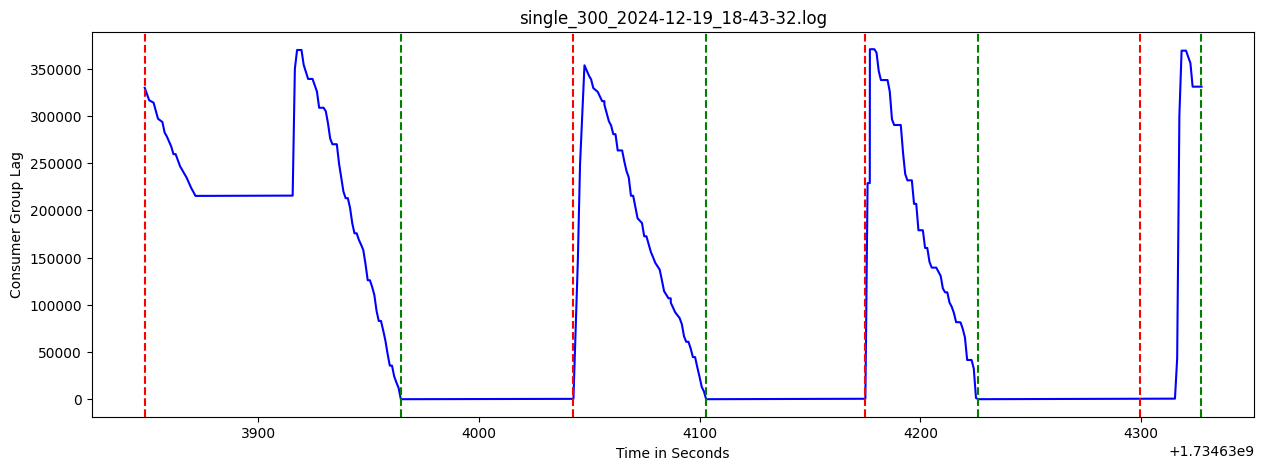

93.86566670735677


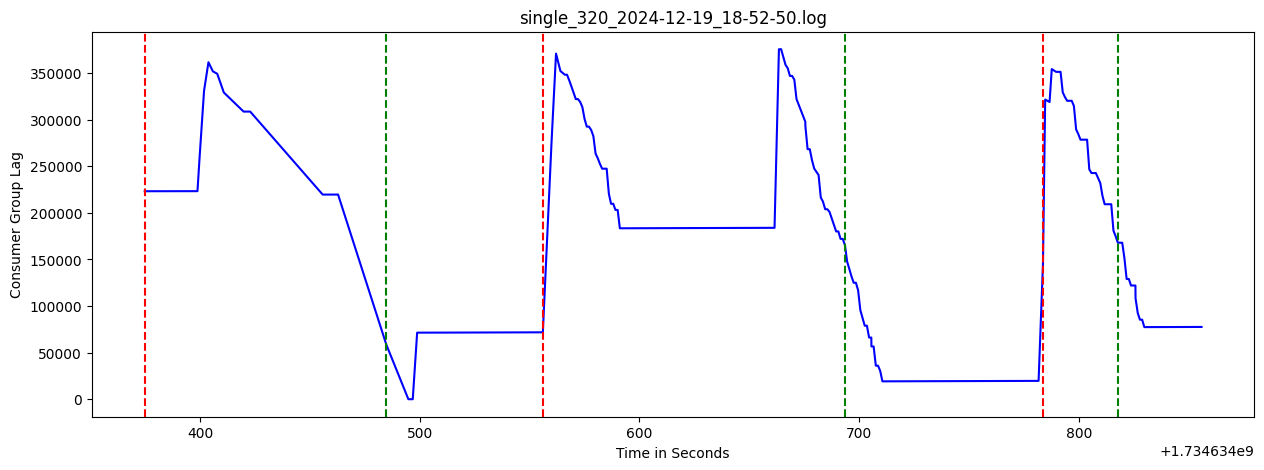

62.31399995088577


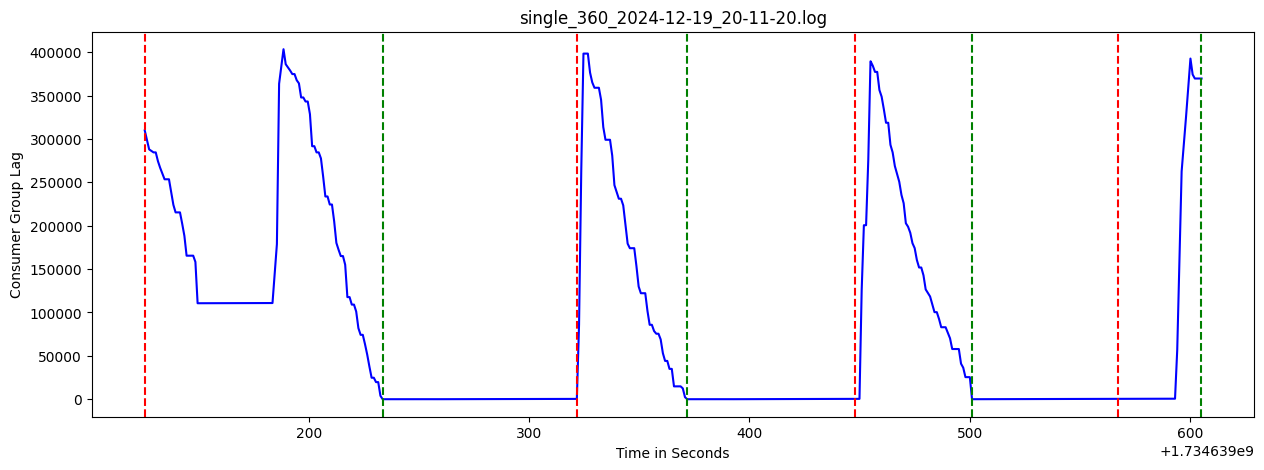

64.85900002717972


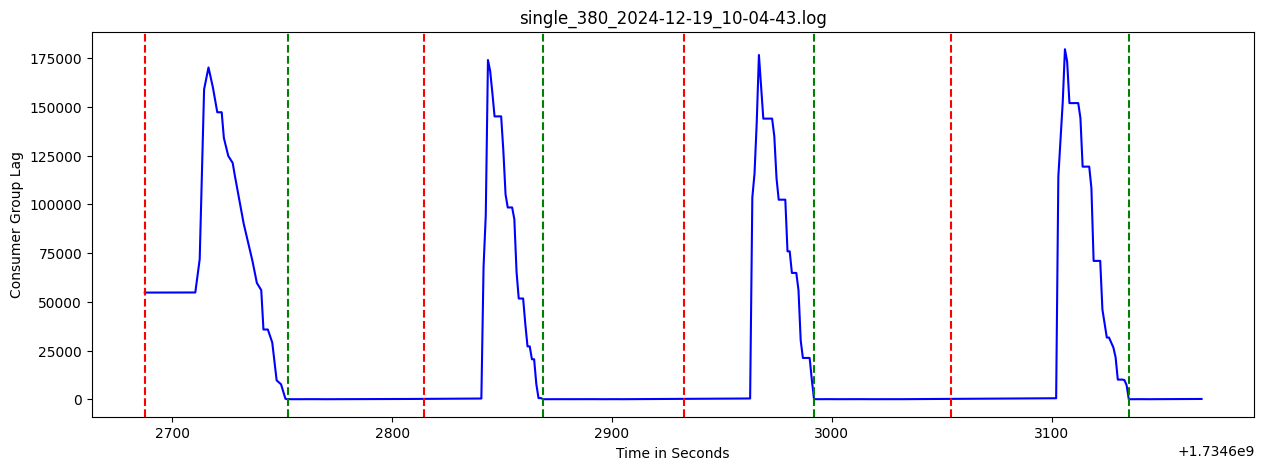

68.03749996423721


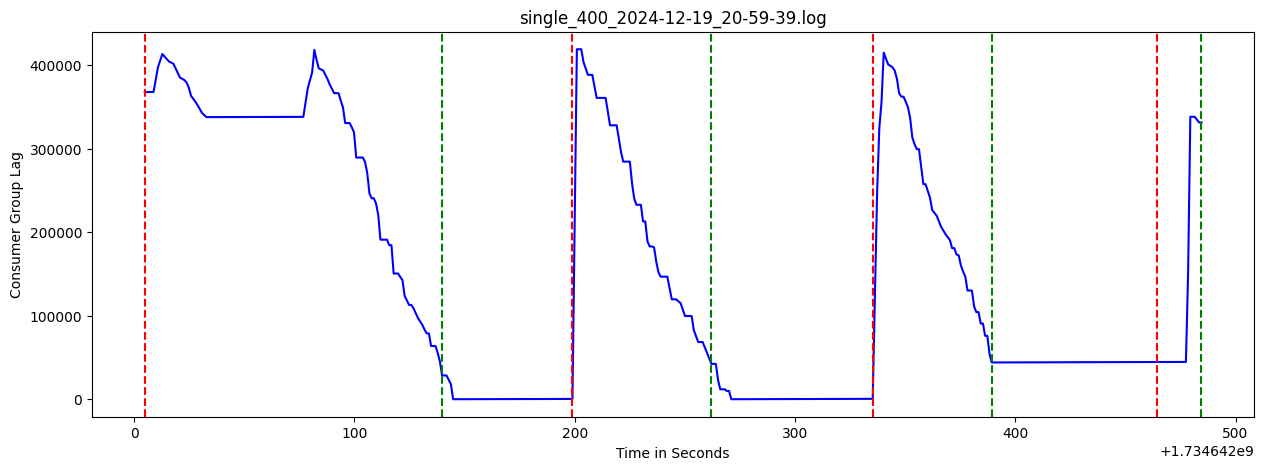

63.603999972343445


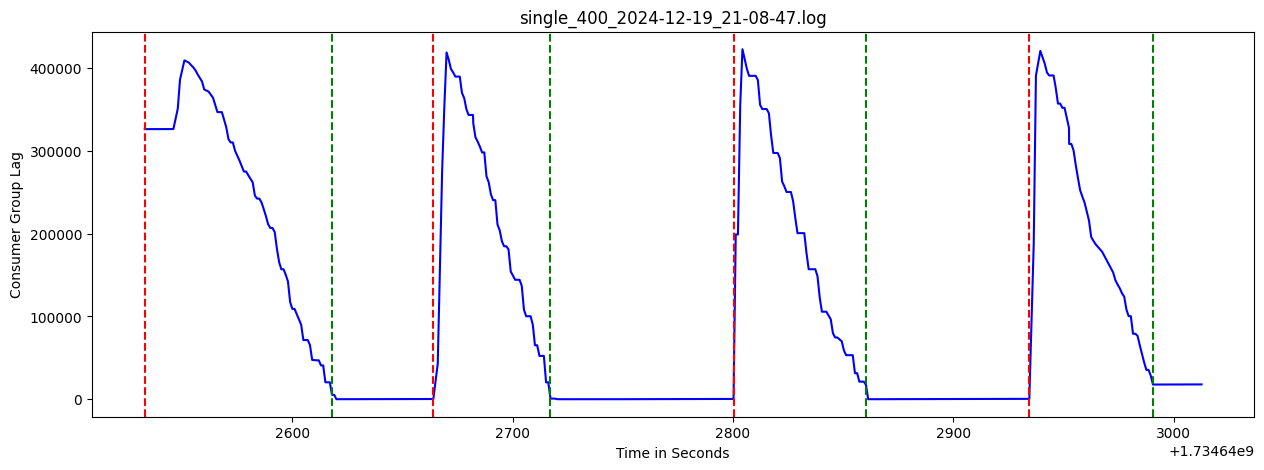

61.348500072956085


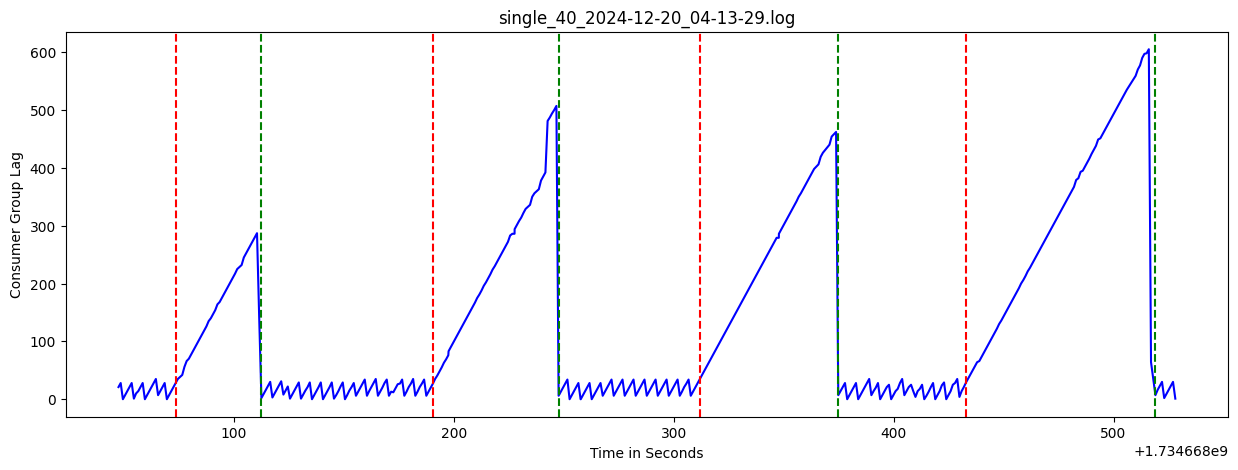

68.11799991130829


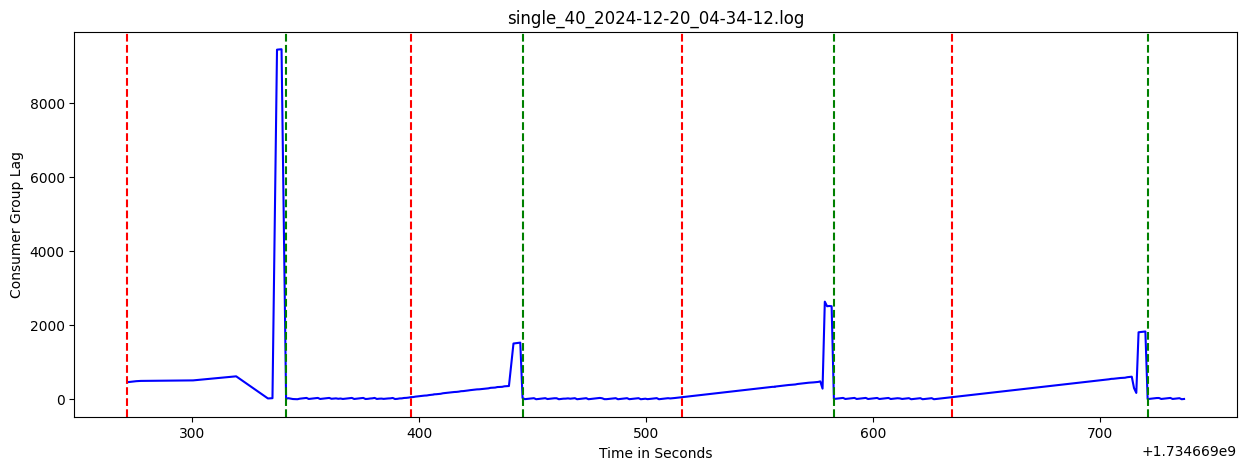

63.573499977588654


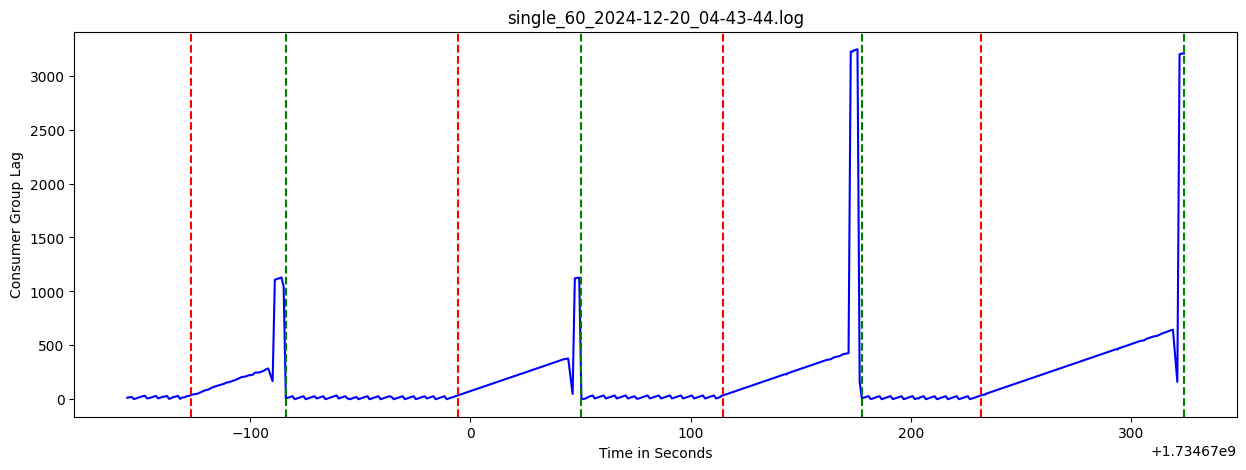

60.861749947071075


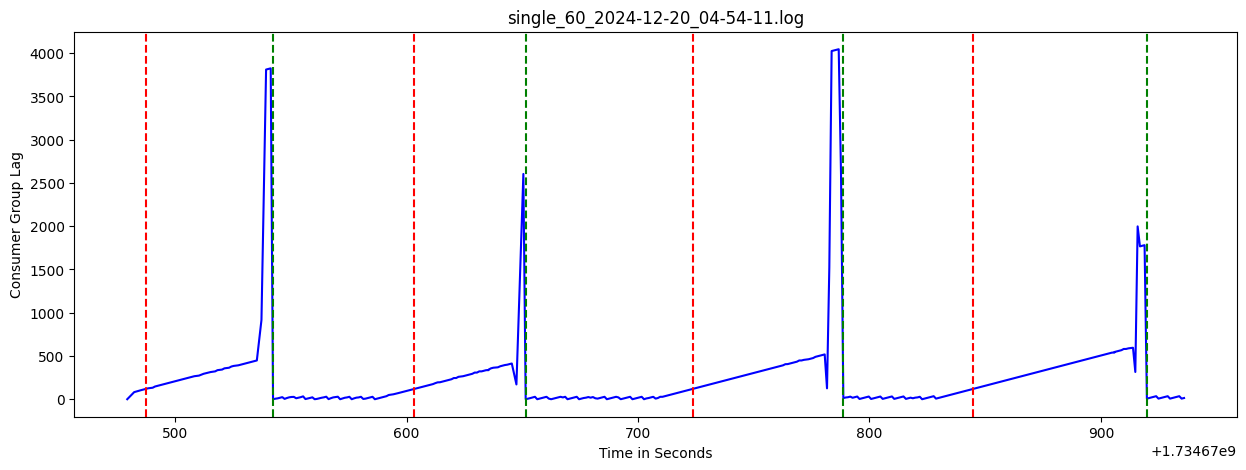

63.37000000476837


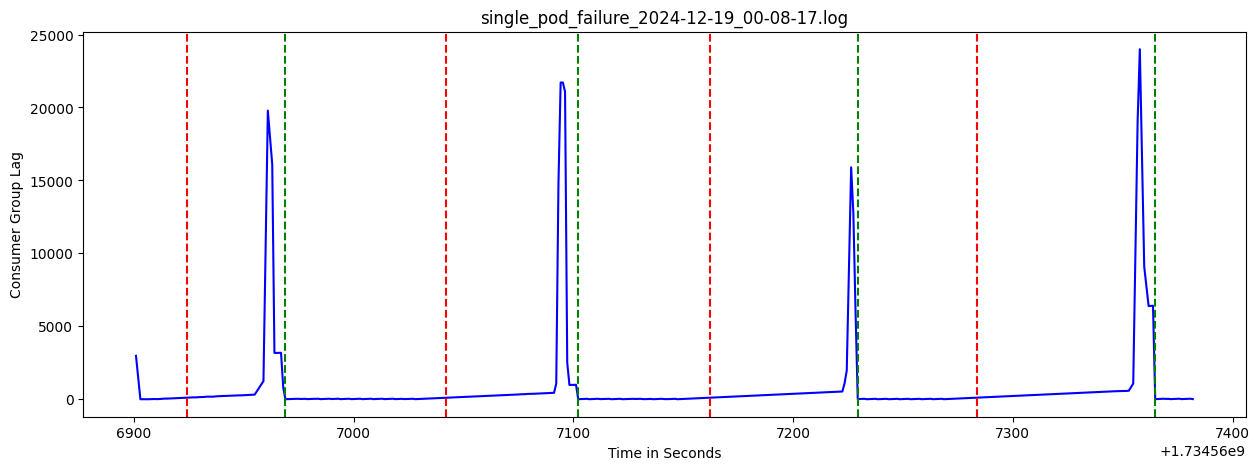

50.08633335431417


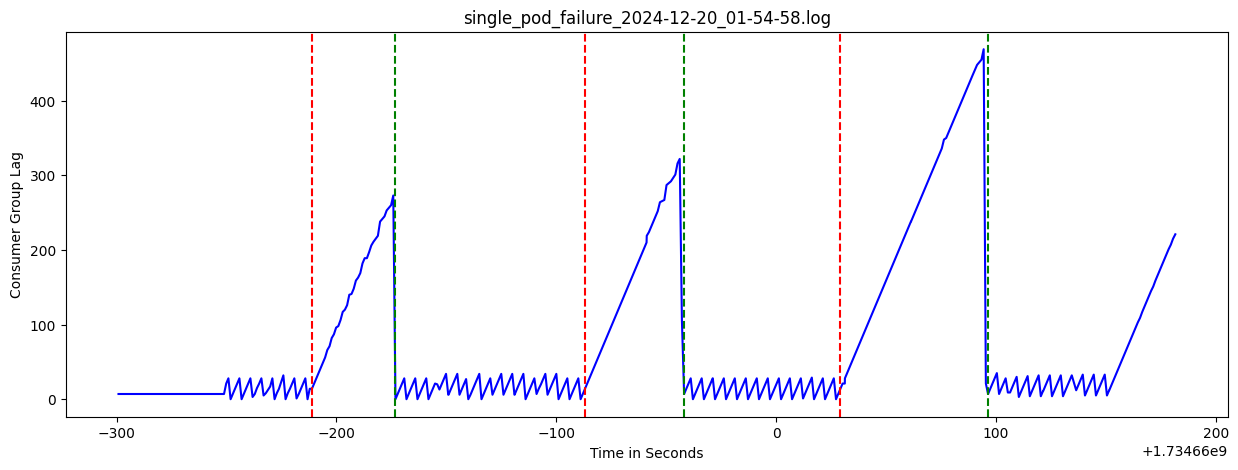

56.339000046253204


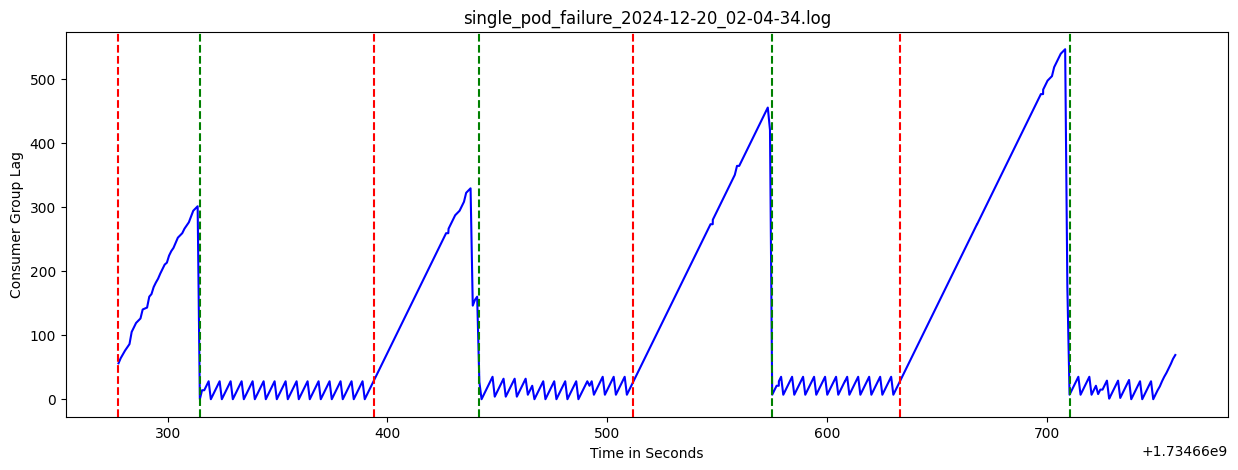

In [4]:
chaos_groups_df = []
average_recovery_time_df = pd.DataFrame(columns=['Experiment', 'RecoveryTime'])
    
for i, dataframe in enumerate(dataframes):
    dataframe = r.identify_chaos_around_maxima(dataframe, 'Value', prominence=50)    
    chaos_group_count, chaos_groups = r.find_number_of_chaos_groups(dataframe)
    print(r.get_average_chaos_event_durations([dataframe], [chaos_groups]))
    r.plot_chaos_events(dataframe, chaos_groups, title=files[i])
    

### Research question 1
How quickly does the HM-LC recover from system
failures in the environment, compared to previous studies?

In [5]:
# Define the pattern for no latency runs
file_pattern = "single_pod_"

accumulated_dfs = []
dfs_chaos_groups = []

# Find the average recovery time for the no latency runs
for i, dataframe in enumerate(dataframes):
    if file_pattern in files[i]:
        accumulated_dfs.append(dataframe)
        chaos_group_count, chaos_groups = r.find_number_of_chaos_groups(dataframe)
        dfs_chaos_groups.append(chaos_groups)
        
average_recovery_time = r.get_average_chaos_event_durations(accumulated_dfs, dfs_chaos_groups)
print(f"The average recovery time for single pod runs is {average_recovery_time} seconds")

The average recovery time for single pod runs is 56.59844446844525 seconds


### Cherry Pick of two Plots for Fig 2

Length of high_latency_df: 215
Length of no_latency_df: 215


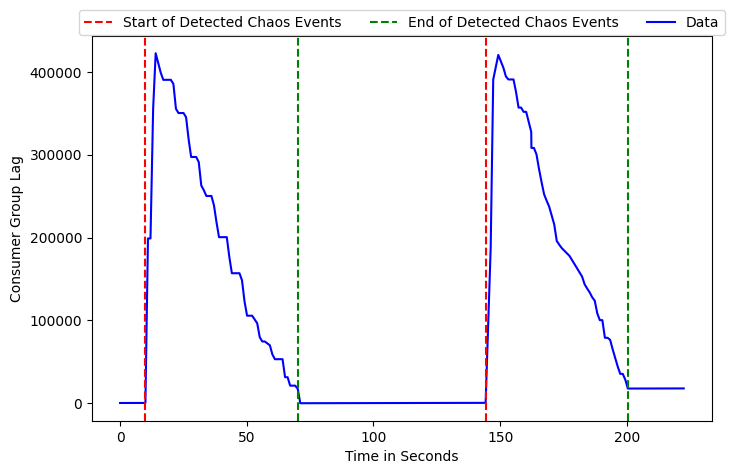

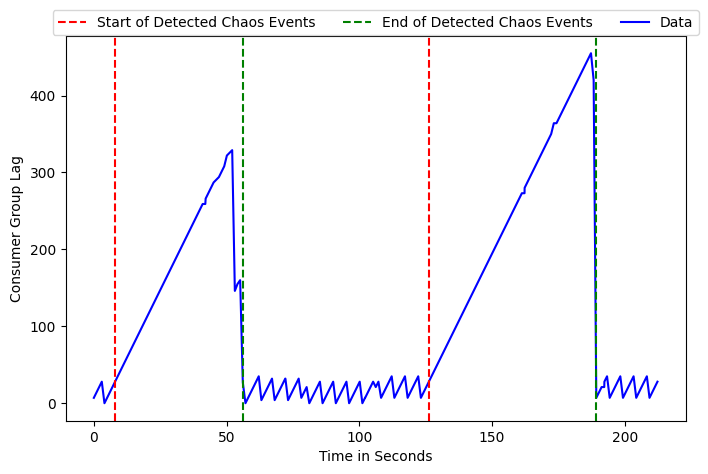

In [6]:
# cherry picked from the file list
high_latency_name = "single_400_2024-12-19_21-08-47.log"
no_latency_name = "single_pod_failure_2024-12-20_02-04-34.log"

high_latency_index = None
no_latency_index = None

for i, name in enumerate(files):
    if name == high_latency_name:
        high_latency_index = i
    if name == no_latency_name:
        no_latency_index = i

# Get dfs, from indexes, find chaos groups
high_latency_df = dataframes[high_latency_index].copy()
no_latency_df = dataframes[no_latency_index].copy()
high_latency_df = r.identify_chaos_around_maxima(high_latency_df, 'Value', prominence=50)
no_latency_df = r.identify_chaos_around_maxima(no_latency_df, 'Value', prominence=50)
high_latency_cgc, high_latency_cg = r.find_number_of_chaos_groups(high_latency_df)
no_latency_cgc, no_latency_cg = r.find_number_of_chaos_groups(no_latency_df)

# get average recovery times
high_latency_avg = r.get_average_chaos_event_durations([high_latency_df], [high_latency_cg])
no_latency_avg = r.get_average_chaos_event_durations([no_latency_df], [no_latency_cg])


index_cuttof_high_latency = 240
index_cuttof_no_latency = 100


# Make the dataframes smaller
high_latency_df = high_latency_df.iloc[index_cuttof_high_latency:]
no_latency_df = no_latency_df.iloc[index_cuttof_no_latency:315]

high_latency_df = r.time_normalization(high_latency_df)
no_latency_df = r.time_normalization(no_latency_df)

print(f"Length of high_latency_df: {len(high_latency_df)}")
print(f"Length of no_latency_df: {len(no_latency_df)}")


# Compute chaos shifts and update chaos groups 
updated_high_cg = []
updated_no_cg = []

for cg in high_latency_cg:
    start, end = cg
    start -= index_cuttof_high_latency
    end -= index_cuttof_high_latency
    if start >= 0 and end > 0: 
        updated_high_cg.append([max(0, start), max(0, end)])

for cg in no_latency_cg:
    start, end = cg
    start -= index_cuttof_no_latency
    end -= index_cuttof_no_latency
    if start >= 0 and end > 0:
        updated_no_cg.append([max(0, start), max(0, end)])

updated_high_cg = [
    [min(start, len(high_latency_df) - 1), min(end, len(high_latency_df) - 1)]
    for start, end in updated_high_cg
    if start < len(high_latency_df) and end < len(high_latency_df)
]

updated_no_cg = [
    [min(start, len(no_latency_df) - 1), min(end, len(no_latency_df) - 1)]
    for start, end in updated_no_cg
    if start < len(no_latency_df) and end < len(no_latency_df)
]

# Plots
r.plot_chaos_events(high_latency_df, updated_high_cg, title="", legend=True, figsize=(8,5))
r.plot_chaos_events(no_latency_df,updated_no_cg, title="", legend=True, figsize=(8,5))


### Answer RQ 2, Plot Fig 3

In [7]:
import re
import matplotlib.pyplot as plt

df_rq2 = pd.DataFrame(columns=['Latency', 'RecoveryTime'])

# Pattern for extracting the latency from the file name
# Example: "single_{latency}_*"
# use regex to extract the latency
pattern = "single_(\d+)_*"

# Iterate over all df's finding the latency by extracting from the file name
# calculating the avg recovery time and adding it to the df_rq2
for i, df in enumerate(dataframes):
    match = re.search(pattern, files[i]).group(1)
    
    if match == "pod":
        latency = 0
    else:
        latency = int(match)
        
    df = r.identify_chaos_around_maxima(df, 'Value', prominence=50)
    _, chaos_groups = r.find_number_of_chaos_groups(df)
    for j, group in enumerate(chaos_groups):
        recovery_time = r.compute_td(df, group[0], group[1])
        
        new_row = pd.DataFrame({'Latency': [latency], 'RecoveryTime': [recovery_time]})
        df_rq2 = pd.concat([df_rq2, new_row], ignore_index=True)


/tmp/ipykernel_101741/4194620840.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_rq2 = pd.concat([df_rq2, new_row], ignore_index=True)


AttributeError: 'NoneType' object has no attribute 'group'

In [ ]:
# Plotting the scatterplot
plt.figure(figsize=(8, 8))
plt.scatter(df_rq2['Latency'], df_rq2['RecoveryTime'], color='blue', marker='x')

# Adding title and labels
plt.xlabel('Latency in Milliseconds')
plt.ylabel('Recovery Time in Seconds')

# Show the plot
plt.show()

/tmp/ipykernel_101741/1841291414.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper left', frameon=True, facecolor='white', edgecolor='black')


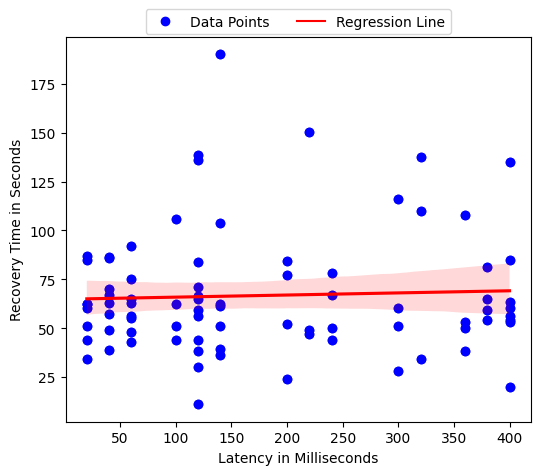

In [27]:
    # Plotting the scatterplot
plt.figure(figsize=(6, 5))
plt.scatter(df_rq2['Latency'], df_rq2['RecoveryTime'], color='blue', marker='o')

# Dropping rows with any None values to ensure numeric types
df_rq2 = df_rq2.dropna().astype(float)

# Creating the scatter plot and adding a regression line
sns.regplot(x='Latency', y='RecoveryTime', data=df_rq2, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

plt.legend(loc='upper left', frameon=True, facecolor='white', edgecolor='black')


# Define legend
legend = [
{"label": "Data Points", "color": "blue", "marker": "o", "linestyle": "none"},
{"label": "Regression Line", "color": "red", "linestyle": "-"},
]
# legend lines
legend_lines = [
    Line2D(
        [0], [0], color=item["color"], linestyle=item.get("linestyle", "-"), label=item["label"], marker=item.get("marker", None),
    )
    for item in legend
]
plt.legend(handles=legend_lines, loc='upper center', bbox_to_anchor=(0.5, 1.09), ncol=len(legend), facecolor='white',)


# Adding title and labels
plt.xlabel('Latency in Milliseconds')
plt.ylabel('Recovery Time in Seconds')

# Show the plot
plt.show()